# Titanic: Machine Learning
---
O desafio do Titanic é o carro-chefe no portfólio de um estudante de Ciência de Dados e Machine Learning. É também uma das competições mais famosos do mundo na plataforma do [kaggle](http://kaggle.com).

A história do naufrágio do RMS Titanic é bastante conhecido, graças ao filme homônimo. O navio era é o mais luxuoso e mais seguro de todos os tempos. Considerado uma maravilha da engenharia, a confiança era tão grande nele que foi anunciado aos potenciais clientes como sendo um navio impossível de afundar, contudo, o final você já sabe. Mesmo  com a tecnologia avançada após colidir com um iceberg em 15 de abril de 1912, naufragou e **matou 1502 (mil quinhentos e duas) pessoas de um total de 2224 (duas mil e vinte e quatro)** em sua viagem inaugural que saia de Southampton na Inglaterra e iria a té a cidade de Nova Iorque no Estados Unidos. O navio hoje se encontra submerson no oceano a cerca de 600 km da costa de Newfoundland, no Canadá.

![Titanic](https://qvz.uz/wp-content/uploads/2019/09/10d92262522cbe3d01d8e92b4cc131d5.jpg)

O principal fator para o número alto de mortes foi a indisponibilidade de salva-vidas suficientes para toda a tripulação e passageiros. Dentro desse cenário só escapou quem teve sorte ou será que houveram mais fatores determinantes para a sobrevivência dos passageiros? 

Com os dados **reais**  disponibilizados, vamos fazer uma análise exploratória e com testagem de hipótestes e, ao final. vamos construir um modelo preditivo para descobrir os fatores que contaram para a sobrevivência.

Será que você escaparia dessa tragédia? Quais seriam as chances de sobrevivência se você tivesse viajado? E se tivesse viajado com seu cônjuge e filhos?

> **De forma resumida, o objetivo é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**


## Sobre o projeto

A ideia é utilizar de fatores para provar que até em um momento trágico e de profunda agitação, ainda assim há fatores não aleatórios que influenciam o resultado final e, com **Data Science** ou **Ciência de Dados** procuramos de forma simplista (acessível a leigos e iniciantes) não aprofundar em nenhum conceito ou análise.

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Análise Exploratoria dos Dados
4. Preparação dos Dados
5. Construção do Modelo e Avaliação

## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo

Fazer uma **análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

e também **construir um modelo que dê a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como *input* (entrada).


### Métrica de Desempenho

O *score* é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a **acurácia** do modelo.

## 2. Obtenção dos Dados

Os [dados disponibilizados](https://www.kaggle.com/c/titanic/data) pelo Kaggle foram divididos em dois grupos:

* Dataset de treino (```train.csv```)
    * Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não. 
    * Composto por diversas *features* como gênero do passageiro e classe do embarque.
* Dataset de Teste (```test.csv```)
    * Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
    
Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (```gender_submission```).

Para conseguir baixar os arquivos, é precisar criar um login no Kaggle antes.

**Importação da bibliotecas pandas**

In [1]:
import pandas as pd
# a configuração abaixo permite visualizar todas as colunas
pd.options.display.max_columns = None

**Obtendo dados**

In [2]:
train=pd.read_csv('/home/amador/dados/titanic/train.csv')
test=pd.read_csv('/home/amador/dados/titanic/test.csv')

**Q1. Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?**

**Verificando as dimensões do DataFrame**

In [3]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


## 3. Análise Exploratória dos Dados
**Q2. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

**Identificar o tipo de cada variável**

In [4]:
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Q3. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

**Ver a porcentagem valores faltantes**

In [5]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**Q4. Como é a distribuição estatística dos dados?**

**Para valores numéricos**

In [6]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Para valores categóricos**

In [7]:
#describe para não numericas
train.describe(include=['O'])

Name   Sex  Ticket        Cabin  \
count                                         891   891     891          204   
unique                                        891     2     681          147   
top     Davison, Mrs. Thomas Henry (Mary E Finck)  male  347082  C23 C25 C27   
freq                                            1   577       7            4   

       Embarked  
count       889  
unique        3  
top           S  
freq        644

Olhando esses dados a gente observa que:
* Os valores para ```Name``` são únicos, um para cada pessoa;
* Não há *missing values* para ```Name``` e ```Sex```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton

**Histograma das variáveis numéricas**

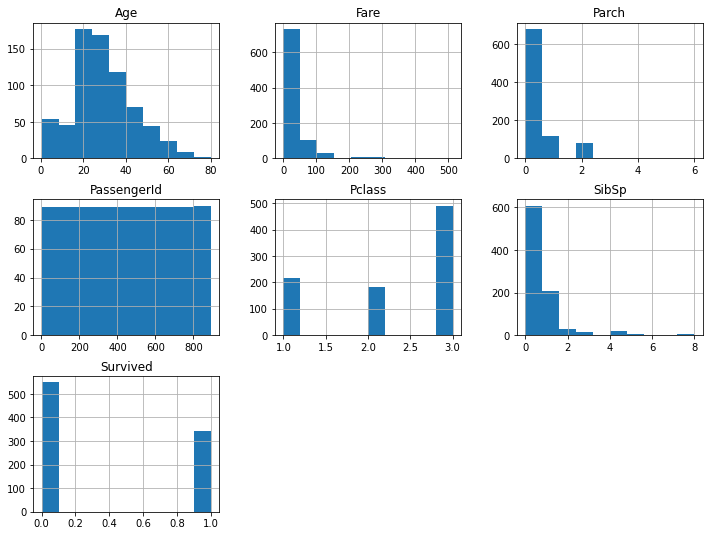

In [8]:
train.hist(figsize=(12,9));

A seguir será apresentada uma breve exploração via **Panda Profiling**
> Essa biblioteca serve para fazer uma exploração nos dados permitindo um breve reconhecimento estatistico descritivo, como número de variáveis presentes e células faltantes, tipo das variáveis etc.

> É importante frisar que na parte de **Correlations** (correlações) há como ver de modo rápido e de forma gráfica, as correlações de Pearson, Spearman, Kendall, Phik (φk) e Cramér's V (φc)

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title='Titanic',html={'style':{'full_width':True}})
profile

**Q5. Quais grupos de pessoas tinham mais chances de sobrevivência??**

**Percentual de sobrevivente por sexo**

In [10]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

**Visualização do total de sobreviventes por Sexo**

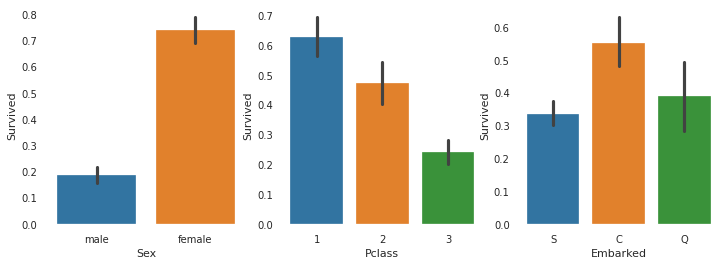

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotagem dos gráficos para Survived vs. Sex, Pclass e Embarked

fig, (axis1,axis2,axis3)=plt.subplots(1,3,figsize=(12,4))

sns.barplot(x='Sex',y='Survived',data=train, ax=axis1)
sns.barplot(x='Pclass',y='Survived',data=train, ax=axis2)
sns.barplot(x='Embarked',y='Survived',data=train, ax=axis3);
#percebe-se que mulheres têm mais chances de escapar
#classe 3 tem menos da metade da classe 1 e próximo da metade da 2

**Analisando a probabilidade de sobrevivência pelo Sexo**

In [12]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

**Visualização da influência da idade com FacetGrid**

FacetGrid é uma grade de plotagem múltipla para plotagem de relacionamentos condicionais

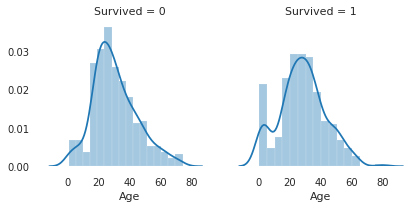

In [13]:
age_survived=sns.FacetGrid(train,col='Survived')
age_survived.map(sns.distplot,'Age');
#há um pico nas crianças pequenas que sobreviveram

**Plotando scatter matrix do pandas**

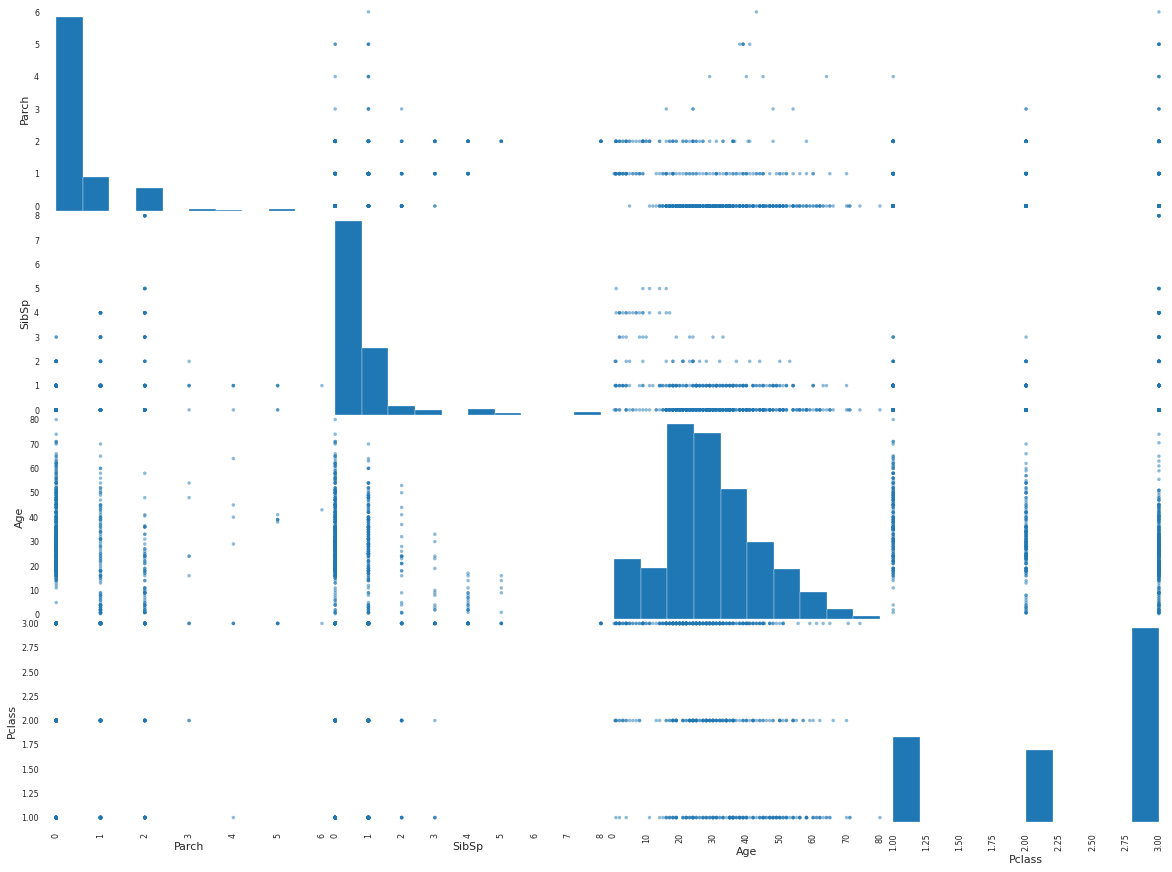

In [14]:
columns=['Parch','SibSp','Age','Pclass']
pd.plotting.scatter_matrix(train[columns],figsize=(20,15));
# concentração de pessoas mais velhas estão na classe 1 e mais novas na 3

**Heatmap** 

* Serve para visualizar correlações

* Já está presente no pandas-profiling

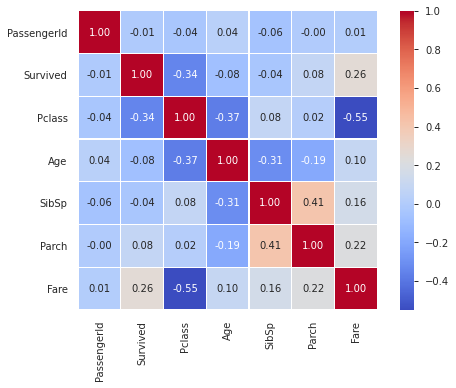

In [15]:
sns.heatmap(train.corr(),cmap='coolwarm',fmt='.2f',linewidths=0.1,vmax=1.0,
           square=True,linecolor='white',annot=True);

## 4. Preparação dos dados

Como sempre gosta de frisar o Professor Carlos Melo da [Sigmoidal](https://sigmoidal.ai):

>" Um projeto de data science não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.
Quando a gente pega o *notebook* de alguém, fica sempre a impressão que está bem estruturado e que foi "direto ao ponto*. No entanto, antes de trazer uma versão bonitinha, eu vou e volto ao começo inúmeras vezes!
Lembre-se disso: uma versão final é uma versão que foi reescrita várias vezes. Vá e volte ao começo sempre que precisar para adicionar informações novas que fizeram sentido"

* Boa prática para um modelo de *Machine Learning* é juntar os *datasets* de treino e teste em um único, e separar novamente no final.

* Muitas vezes a gente vai fazer um *feature engineering*, criar variáveis *dummy* ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

* Por isso, é muito mais fácil fazer todas as etapas para um único *DataFrame* e dividir novamente entre treino e teste.

In [16]:
# salvando os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvando PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extraindo coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenando treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

#pode ser só um df_merged.shape

df_merged.shape: (1309 x 11)


In [17]:
# identificar o tipo de cada variável
display(df_merged['Name'].value_counts().sum())

# ver as 5 primeiras entradas do conjunto de treino
display(df_merged['Cabin'].value_counts().sum())

1309

295

### Seleção de *features*

Em um cenário real de Data Science é comum ter dados que não servem para nada e outros que não tem peso ou significância nenhuma no modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais *features* serão usadas para o modelo de *Machine Learning*.

No nosso caso, vamos desconsiderar as variáveis ```['PassengerId', 'Name', 'Ticket', 'Cabin']```, pois **aparentemente** não parecem relevantes.
* 'PassengerId', 'Name': e 'Ticket' por serem valores únicos para cada passageiro.
* 'Cabin' por não representar tanta importância, uma vez que já há o 'PClass', ou seja, se o passageiro embarcou na 1ª, 2ª ou 3ª classe.

> Não é o foco desse problema, contudo essas variáveis podem ser utilizadas, por exemplo, para saber quanto homens chamados John morreram ou, se a pessoa estava em um cabine com outras pessoas ou só teve mais chance de sobreviver, ou também numerologicamente, o Ticket que inicia ou termina em tal ou tais números ou passageiro com ID iniciado ou terminado em tal ou tais números etc. Contudo, isso está, aparentemente mais atribuido à aleatoriedade do que a uma padrão como nas *features* selecionadas.

> Esse tipo de afirmação só pode ser feita de duas formas: 1º Conhecimento do caso em estudo; e 2º Análise Exploratória.
* Veja que falei **E**, não **OU**.


**Dropando colunas que, aparentemente, sçao irrelevantes**

In [18]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Valores *faltantes*

Vamos dar uma olhada nos valores que faltam em cada coluna e tratar esses campos vazios.
Após visualizar o número de valores faltantes em cada coluna, normalmente se aplica uma das seguintes técnicas:

* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente etc);
* Preencher com valor que não irá inteferir, exemplo o valor zero em uma coluna que será utilizada para soma; e
* Excluir a linha inteira.

Em cada caso, o cientista de dados, deve tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

**Visualizando os faltantes novamente**

In [19]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

**Fazendo substituições nos faltantes por suas medias e contagem**

In [20]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

**Visualizando os dados**

In [21]:
df_merged.head(3)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S

### Preparando as variáveis pro modelo
lembrando que, os modelos matemáticos aceitam números, não formato categórico.

In [22]:
# convertendo 'Sex' em 0 e 1 para 'male' e 'female', respectivamente
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_914  Embarked_C  \
0       3    0  22.0      1      0   7.2500             0           0   
1       1    1  38.0      1      0  71.2833             0           1   
2       3    1  26.0      0      0   7.9250             0           0   
3       1    1  35.0      1      0  53.1000             0           0   
4       3    0  35.0      0      0   8.0500             0           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

### Recuperando os datasets de treino e teste

In [23]:
# recuperando datasets de treino e teste
train = df_merged.iloc[:train_idx] # até o train_idx
test = df_merged.iloc[train_idx:] # do train_idx em diante

## 5. Contrução do Modelo e Avaliação
A etapa mais demorada já passou, Análise Exploratória dos Dados e Preparação e Tratamento deles.
* Em todas as fases de Data Science em comum ir e voltar várias vezes a fim otimizar todo o projeto em seu escopo.
* Até aqui não seria diferente, contudo na parte de construção do modelo, é bem mais rápido, se levado em conta que todo o "trabalho sujo" já foi feito.

**Serão construidos dois modelos:**
* Regressão Logística 
* Árvore de Decisão

**Importando bibliotecas dos modelos de Machine Learning**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Regressão Logística

In [25]:
# criando um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificando a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [26]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerando arquivo csv para submissão
submission.to_csv('./submission_lr.csv', index=False)

### Árvore de Decisão

In [27]:
# criando um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificando a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [28]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerando arquivo csv para submissão
submission.to_csv('./submission_tree.csv', index=False)

**Importando numpy para utilizar no modelo**

In [29]:
import numpy as np

### Predizendo Valores
Aqui foram passados dados de Daniel (eu) e Fernanda (minha noiva), com intenção de saber quem sobreviveria baseado no modelo.
* 0 = Não sobreviveu
* 1 = Sobreviveu

A sequência é : **class** 	**Sex** (0=homem;1=mulher)	**Age 	SibSp 	Parch 	Fare 	Embarked_914 	Embarked_C 	Embarked_Q 	Embarked_S**

### Eu e minha noiva sobreviveriamos?
* Nossas informações para o modelo:
    * Eu sou homem (0) e ela é mulher (1);
    * Nossa idade é 26 e 25, respectivamente;
    * Em nosso caso, ambos embarcamos na 2ª classe;
* O restante das informações são iguais:
    * Mesma quantidade de cônjuges (1);
    * Ambos sem filhos ou pais (0);
    * Os dois pagaram 32.2 pela passagem; e 
    * Ambos embarcaram de Southampton.

In [30]:
# declarando os valores das variáveis
daniel = np.array([2, 0, 26, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))
fernanda = np.array([2, 1, 25, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Daniel:\t{}".format(tree_model.predict(daniel)[0]))
print("Fernanda:\t{}".format(tree_model.predict(fernanda)[0]))

Daniel:	0
Fernanda:	1


Com meu próprio modelo, eu não teria sobrevivido ao desastre do Titanic, mas minha noiva foi classificada como sobrevivente. Acontece, né!? Afinal, como um bom cristão, devo dar minha vida em prol dela. ;D


In [31]:
# class 	Sex (0=homem;1=mulher)	Age 	SibSp 	Parch 	Fare 	Embarked_914 	Embarked_C 	Embarked_Q 	Embarked_S

# nome = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
# print("nome:\t{}".format(tree_model.predict(nome)[0]))

### Persistindo o modelo em disco
A persistência do modelo é onde se permite utilizar o modelo em um outro ambiente, um servidor ou disponibiliza-lo para uma outra aplicação. 

Aqui será utilizado o método *dump* da biblioteca **joblib**.

É bem fácil persistir em disco:
* Importa-se o método:
    * from joblib import dump
* Chama-se o método passando o modelo treinado e o nome o qual o arquivo será salvo:
    * dump(tree_model,'modelo_titanic')

In [32]:
from joblib import dump
# formato binário comum
dump(tree_model,'modelo_titanic')

# formato binário .pickle
dump(tree_model,'modelo_titanic.pickle')

# formato binário .joblib
dump(tree_model,'modelo_titanic.joblib')

['modelo_titanic.joblib']

### Final
Outros algoritmos devem ser testados, inclusive o Random Forest que é uma otimização natural das Árvores de Decisão ou Decision Tree, contudo o foco desse notebook não é esgotar essa base de dados, mas trazer uma abordagem inicial.